<a href="https://colab.research.google.com/github/nnh92/Kmeans-Clustering/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

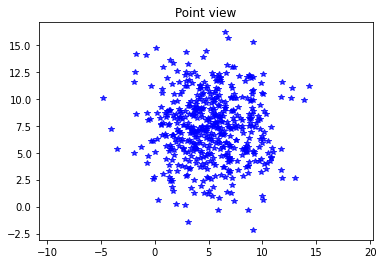

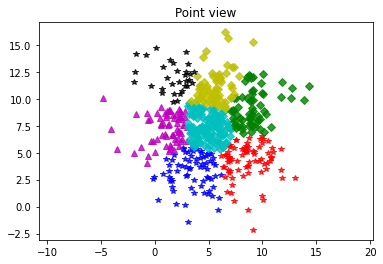

In [26]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


X = np.random.multivariate_normal([5,7],[[10,0],[0,10]],500)
dtA = pd.read_csv('https://raw.githubusercontent.com/nnh92/Kmeans-Clustering/main/Database-A.csv').values
dtB = pd.read_csv('https://raw.githubusercontent.com/nnh92/Kmeans-Clustering/main/Database-B.csv').values
dtC = pd.read_csv('https://raw.githubusercontent.com/nnh92/Kmeans-Clustering/main/Database-C.csv').values

#X = dtA
#X = np.concatenate((dtA,dtB), axis = 0)
#X = np.concatenate((dtA,dtB,dtC), axis =0)
K = 7

original_label = np.asarray([0]*len(X))
#original_label = np.asarray([0]*len(dtA)).T
#original_label = np.asarray([0]*len(dtA) + [1]*len(dtB)).T
#original_label = np.asarray([0]*len(dtA) + [1]*len(dtB) + [2]*len(dtC)).T
#print(original_label)
#print(X.shape)
#print(X)

def kmeans_display(X, label):
  K = np.amax(label) + 1
  X0 = X[label==0,:]
  X1 = X[label==1,:]
  X2 = X[label==2,:]
  X3 = X[label==3,:]
  X4 = X[label==4,:]
  X5 = X[label==5,:]
  X6 = X[label==6,:]
  plt.plot(X0[:,0],X0[:,1],'b*',markersize = 6, alpha = .8)
  plt.plot(X1[:,0],X1[:,1],'r*',markersize = 6, alpha = .8)
  plt.plot(X2[:,0],X2[:,1],'m^',markersize = 6, alpha = .8)
  plt.plot(X3[:,0],X3[:,1],'cD',markersize = 6, alpha = .8)
  plt.plot(X4[:,0],X4[:,1],'gD',markersize = 6, alpha = .8)
  plt.plot(X5[:,0],X5[:,1],'yD',markersize = 6, alpha = .8)
  plt.plot(X6[:,0],X6[:,1],'k*',markersize = 6, alpha = .8)

  plt.axis('equal')
  plt.title('Point view')
  plt.plot()
  plt.show()


#print(dtA)
#print(X)

kmeans_display(X,original_label)

def kmeans_int_centers(X,k):
  return X[np.random.choice(X.shape[0], k, replace = False)]

def kmeans_assign_label(X,centers):
  D = cdist(X,centers)
  return np.argmin(D, axis = 1)

#print(X.shape[0])
#int_centers = kmeans_int_centers(X,3)

def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    Xk = X[labels == k,:]
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

#print(X.shape[0])

def kmeans_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans(X, K):
  centers = [kmeans_int_centers(X, K)]
  i = 0
  labels = []
  while True:
    labels.append(kmeans_assign_label(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1],K)
    if kmeans_converged(centers[-1],new_centers):
      break
    centers.append(new_centers)
    i += 1
  return (centers , labels, i)

kmeans(X, K)

(centers, labels, i) = kmeans(X, K)
kmeans_display(X, labels[-1])



#print([kmeans_int_centers(X,3)])
